# Лабораторная работа №2. Дискретные LTI системы.

Лаборатория цифровой обработки сигналов, ФРКТ МФТИ


Дискретные LTI системы (англ. Linear time-invariant system) — линейные стационарные дискретные системы.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy import signal
import time


# Модуль 1. Линейная дискретная свертка.

## Задача 1.1. Линейная дискретная свертка прямоугольных окон 


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $M$    | 4 | 5 | 6 | 4 | 5 | 6 | 8 | 7 | 8 | 7 |

Вычислить аналитически линейную дискретную свертку двух одинаковых последовательностей $x[k]$ и $h[k]$, таких, что 
$$x[k]=h[k]=\sum_{m=0}^{M-1}\mathbf{1} [k-m], $$ 
где $M$ соответствует варианту, непосредственно воспользовавшись формулой линейной дискретной свертки
$$y[k]=\sum_{m=-\infty}^{\infty} x[m] h[k-m].$$

Проверить результаты с помощью моделирования, воспользовавшись функцией `signal.convolve`

$$
y[k]=\sum_{m=-\infty}^{\infty} x[m] h[k-m] = \sum_{m=0}^{M - 1} x[m] h[k-m]  = \sum_{m=0}^{k} x[m] x[k-m]\\
y[0] = \sum_{m=0}^{0} x[m] x[0-m] = x[0] \cdot x[0] = 1 \\
y[1] = \sum_{m=0}^{1} x[m] x[1-m] = x[0] \cdot x[1] + x[1] \cdot x[0] = 2 \\
y[2] = \sum_{m=0}^{2} x[m] x[2-m] = x[0] \cdot x[2] + x[1] \cdot x[1] + x[2] \cdot x[0] = 3 \\
y[3] = \sum_{m=0}^{3} x[m] x[3-m] = x[0] \cdot x[3] + x[1] \cdot x[2] + x[2] \cdot x[1] + x[3] \cdot x[0] = 4 \\
y[4] = \sum_{m=0}^{4} x[m] x[4-m] = x[1] \cdot x[3] + x[2] \cdot x[2] + x[3] \cdot x[1] = 3 \\
y[5] = \sum_{m=0}^{5} x[m] x[5-m] = x[2] \cdot x[3] + x[3] \cdot x[5] = 2 \\
y[6] = \sum_{m=0}^{6} x[m] x[6-m] = x[3] \cdot x[3] = 1 \\
$$


In [2]:
def plot_signal(signal, index, variable):
    ax = plt.subplot(1, 4, index)
    ax.stem(signal)
    ax.set_xlabel("$k$")
    ax.set_ylabel("$" + variable + "[k]$")
    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))
    ax.grid()


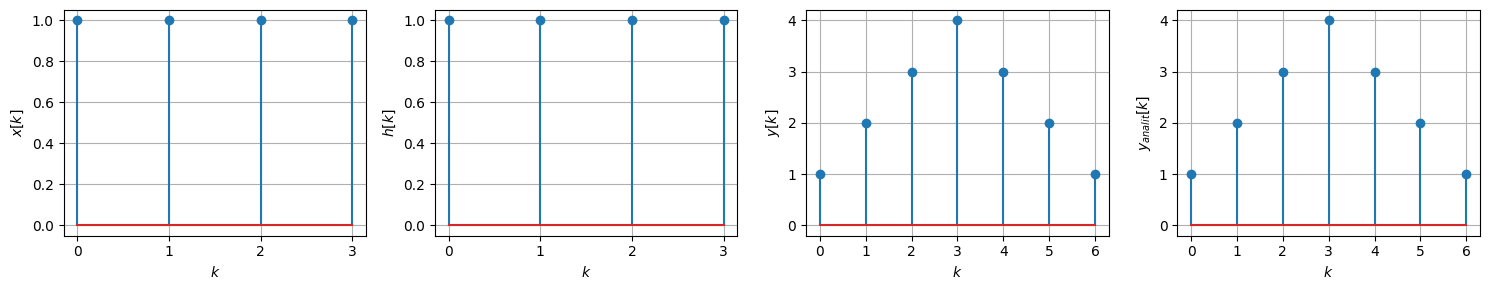

In [4]:
M = 4
xk = np.ones(M)
hk = np.ones(M)

yk = signal.convolve(xk, hk)
yk_analit = np.array([1, 2, 3, 4, 3, 2, 1])
plt.figure(figsize=[15, 3])
plot_signal(xk, 1, "x")
plot_signal(hk, 2, "h")
plot_signal(yk, 3, "y")
plot_signal(yk_analit, 4, "y_{analit}")
plt.tight_layout()


## Задача 1.2. Эффективное вычисление свертки 


| Варианты: |   $1$ |    $2$ |    $3$ |    $4$ |    $5$ |    $6$ |    $7$ |    $8$ |    $9$ |    $10$ |  
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|    $N$    | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ |
|$n_0$| $128$ | $32$ | $256$ | $64$ | $512$ | $1024$ | $230$ | $325$ | $501$ | $1000$ |

Даны последовательности отсчетов
$$ x[k]= \cos(2\pi kn_0/N)$$  
$$ h[k]= \sin(2\pi kn_0/N)$$  
где $n_0$, $N$ взять из таблицы сверху в соответствии с вариантом и $k$ пробегает значения от $0$ до $N-1.$  
Вычислить их линейную дискретную свертку c помощью `signal.convolve()` двумя способами: с помощью прямого вычисления по формуле свёртки и с использованием алгоритма БПФ.  
Сравнить вычислительную эффективность, сделать вывод. 

P.S. На вычисление свертки по формуле может потребоваться значительное количество времени. 

In [9]:
N = 1 << 18
n_0 = 64

k = np.arange(N)
phase = 2 * np.pi * k * n_0 / N
xk = np.cos(phase)
yk = np.sin(phase)


def measure_conv(meth):
    start = time.time()
    signal.convolve(xk, yk, method=meth)
    time2 = time.time()
    print(f"{meth} time: {time2 - start} sec")

measure_conv("fft")
measure_conv("direct")


fft time: 0.05312371253967285 sec
direct time: 8.181346654891968 sec


# Модуль 2. Характеристики LTI систем.






## Задача 2.1. Фильтр скользящего среднего


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|$M_1$|  9 | 14 | 13 |  9 | 12 |  11 | 14 | 13 |  9 | 12 |
|$M_2$| 29 | 50 | 40 | 24 | 50 |  45 | 50 | 40 | 24 | 50 |
| $K$ | 35 | 63 | 57 | 35 | 63 |  55 | 63 | 57 | 35 | 63 |
| $N$ |100 |140 |130 |100 |140 | 115 |140 | 130 | 100 | 140 |

Рассмотрите фильтр скользящего среднего

$$y[k]=\dfrac{1}{M}\sum_{m=0}^{M-1} x[k-m]$$

для $M = M_1$ и $M = M_2$ (из таблицы): 

* Определите и изобразите импульсную характеристику $h[k]$ фильтра.

* Вычислите с помощью `signal.convolve` отклик $y[k]$ фильтра на входное воздействие вида
$$ x_{noise}[k] = \sin(2\pi k / K) + \varepsilon[k], 0\le k\le N-1.$$
где $K,\;N$ — соответствующие числа из таблицы, $\varepsilon[k]$ — белый гаусовский шум (`np.random.normal(mu, sigma, N)`) с нулевым среднем `mu=0` и  среднеквадратическим отклонением $\sigma=0.1$ (`sigma=0.1`).  
* Сравните сигналы $x_{noise}[k]$, $y[k]$ и 
$$ x[k] = \sin(2\pi k / K), 0\le k\le N-1.$$
* Определите и изобразите амплитудно-частотную характеристику (АЧХ) $|H(\nu)|$ фильтра. Как выбор $M$ влияет на результат фильтрации отрезка гармонического сигнала?

$$
h[k] = \frac{1}{M} \sum_{m = 0}^{M - 1} 1[k - m]
$$

In [43]:
M1 = 9
M2 = 24
K = 35
N = 100


def h_f(M):
    return np.ones(M) / M


def dtft(x, M=2048):
    return np.arange(M) / M - 0.5, np.fft.fftshift(np.fft.fft(x, M))


def draw(name, title, xl, yl, *arrs):
    plt.figure(figsize=(18, 5))
    getattr(plt, name)(*arrs)
    plt.title(title)
    plt.xlabel(xl)
    plt.grid()
    plt.ylabel(yl)
    plt.show()


def drawStem(arr, title, xl, yl):
    draw("stem", title, xl, yl, arr)


def drawPlot(x, y, title, xl, yl):
    draw("plot", title, xl, yl, x, y)


def doAll(M):
    h = h_f(M)
    drawStem(
        h,
        f"Импульсная характеристика фильтра скользящего среднего для M = {M}",
        "$k$",
        "$h[k]$",
    )
    ##

    k = np.arange(N)
    xk = np.sin(2 * np.pi * k / K)
    x_noise = xk + np.random.normal(0, 0.1, N)
    y = signal.convolve(x_noise, h)
    drawStem(x_noise, "Сигнал до фильтрации", "$k$", "$x_{noise}[k]$")
    drawStem(
        y, f"Отклик фильтра на зашумлённый сигнал для M = {M}", "$k$", "$y[k]$"
    )
    drawStem(xk, "Оригинальный сигнал", "$k$", "$x[k]$")
    nu, H = dtft(h)
    nu3, H3 = np.hstack([nu-1, nu, nu+1]), np.hstack([H, H, H])

    drawPlot(
        nu3,
        np.abs(H3),
        f"АЧХ фильтра для M = {M}",
        "$\\nu$",
        "$\\left|H\\left(\\nu\\right)\\right|$",
    )


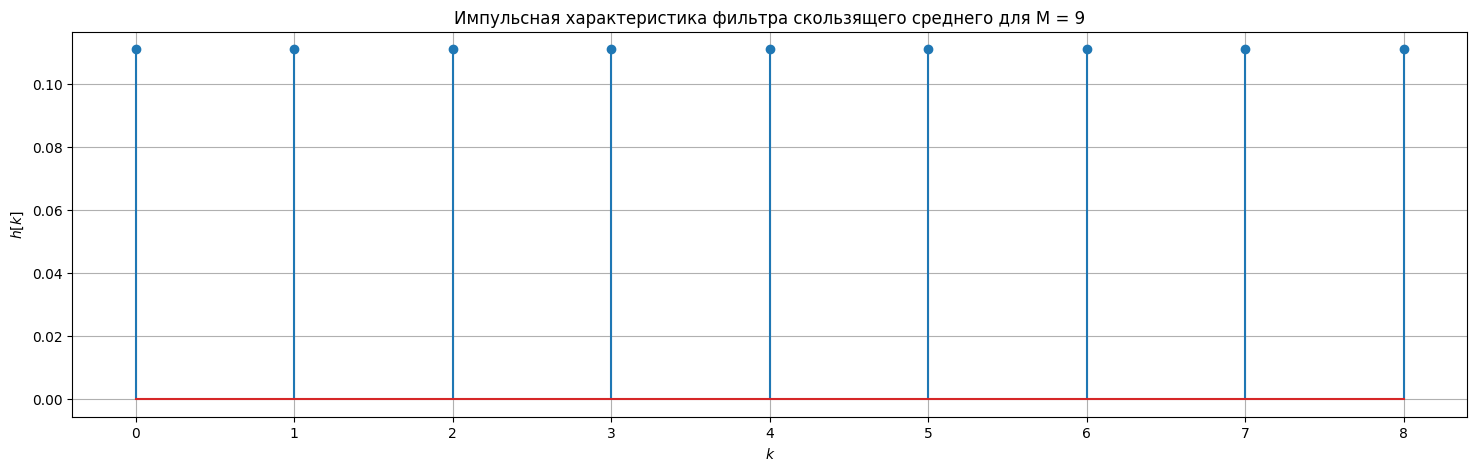

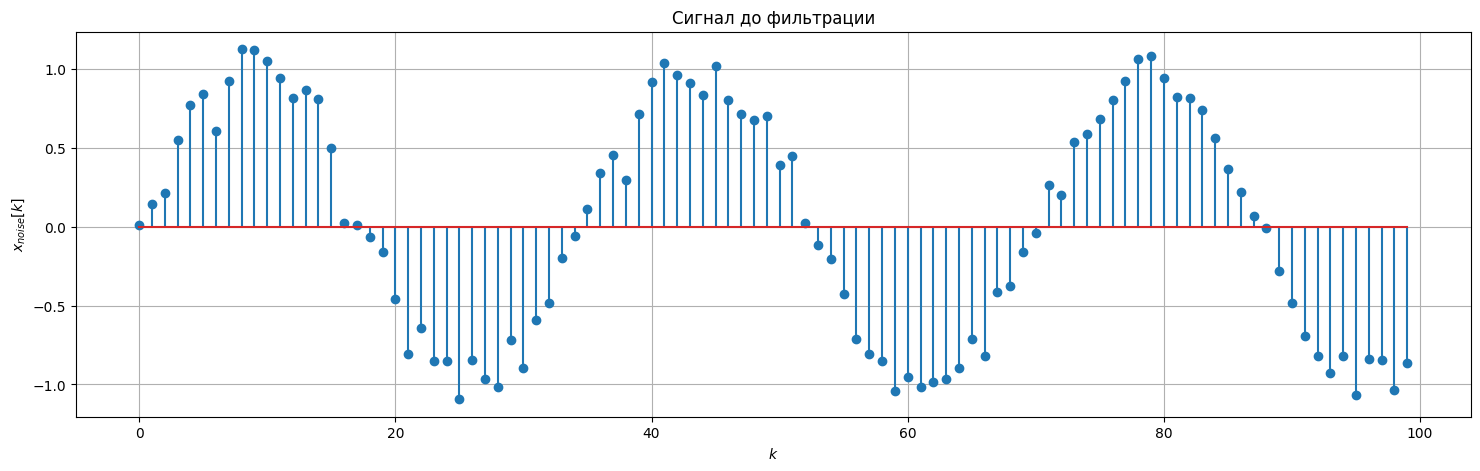

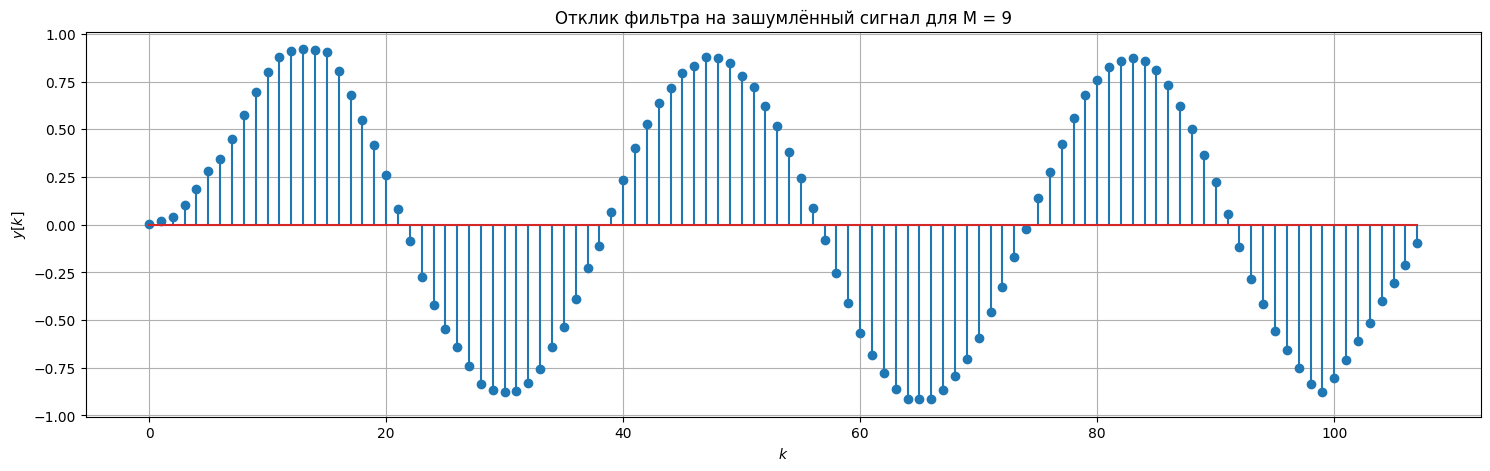

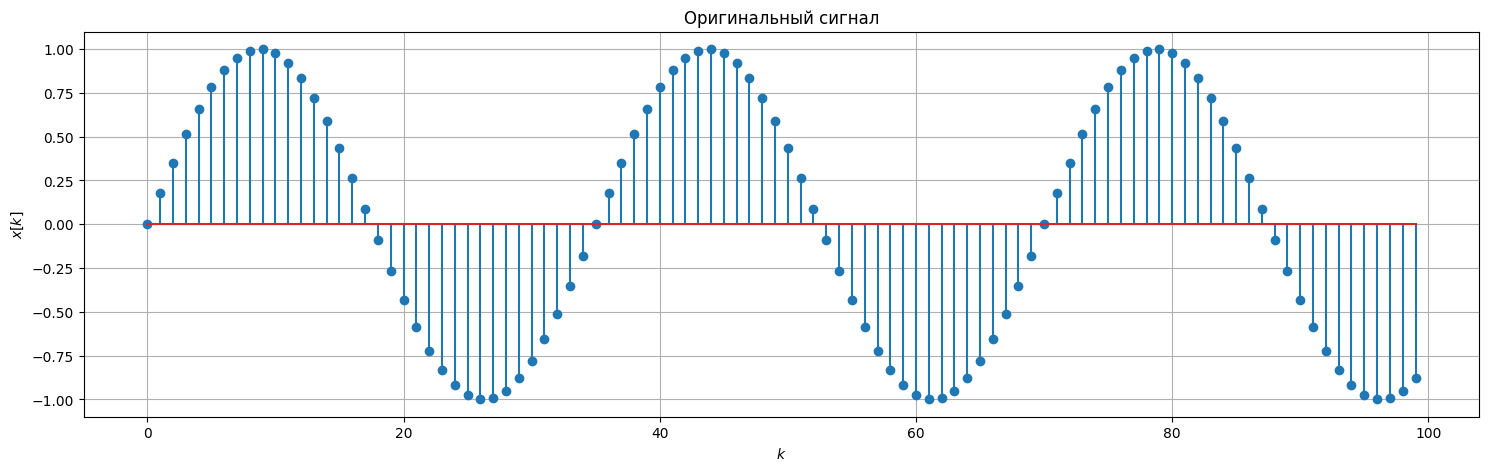

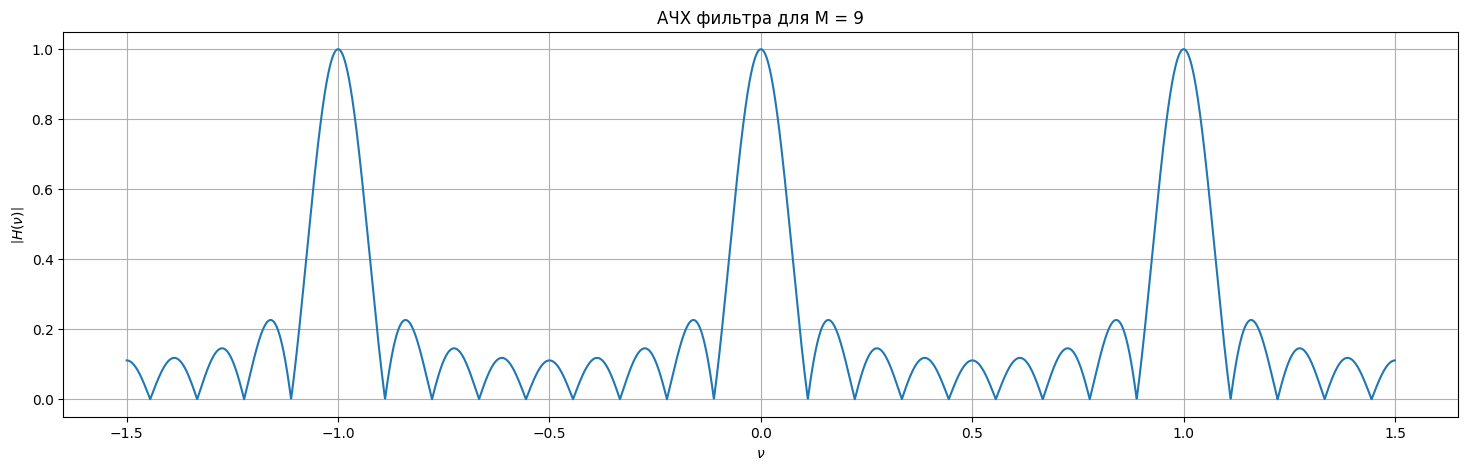

In [44]:
doAll(M1)


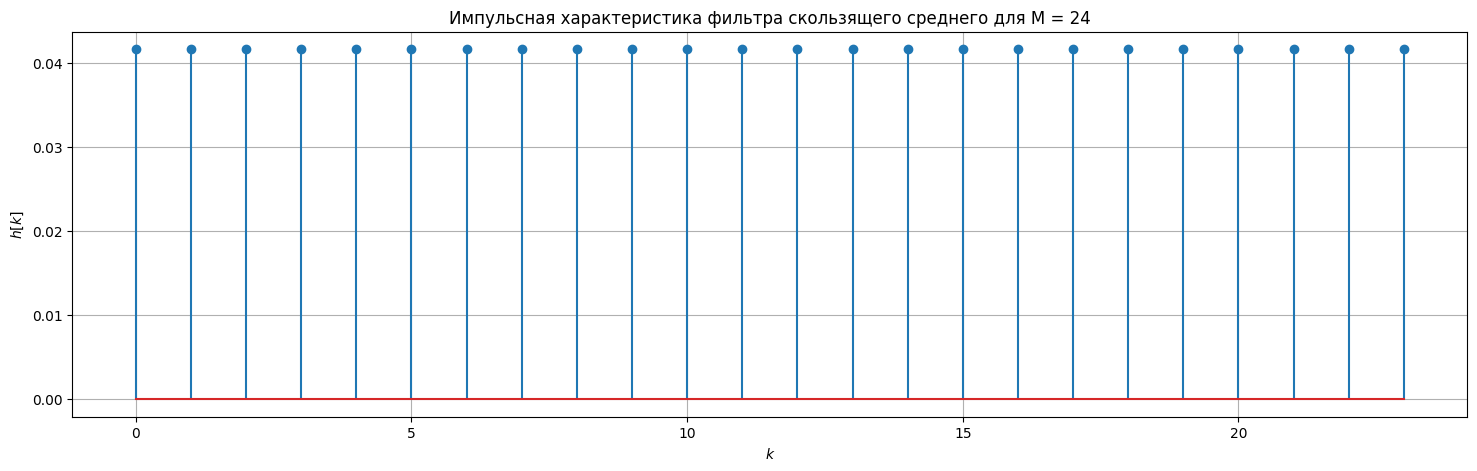

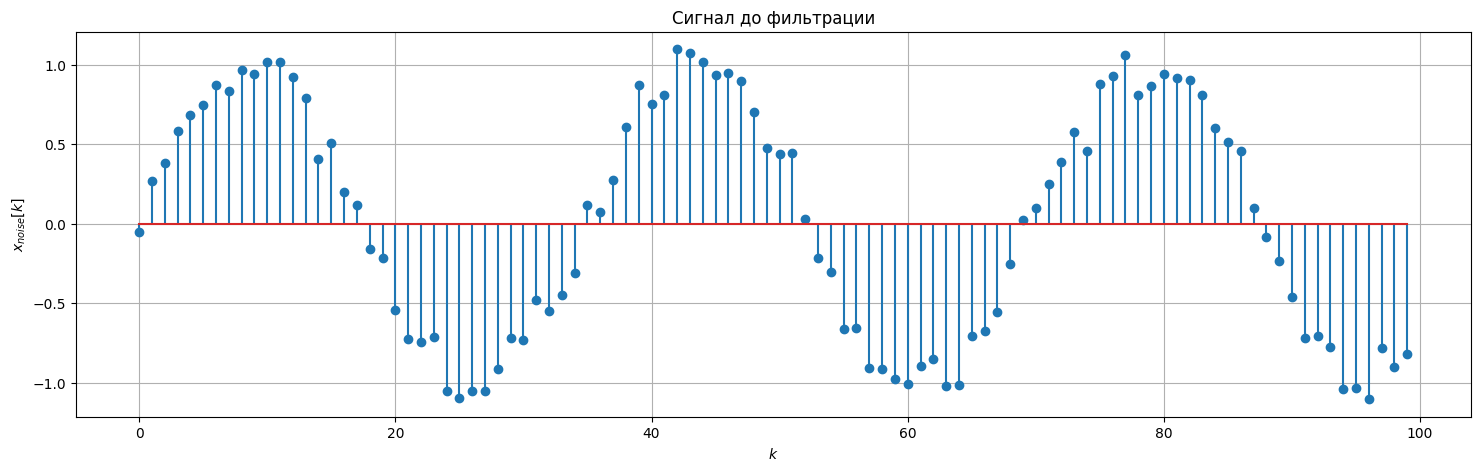

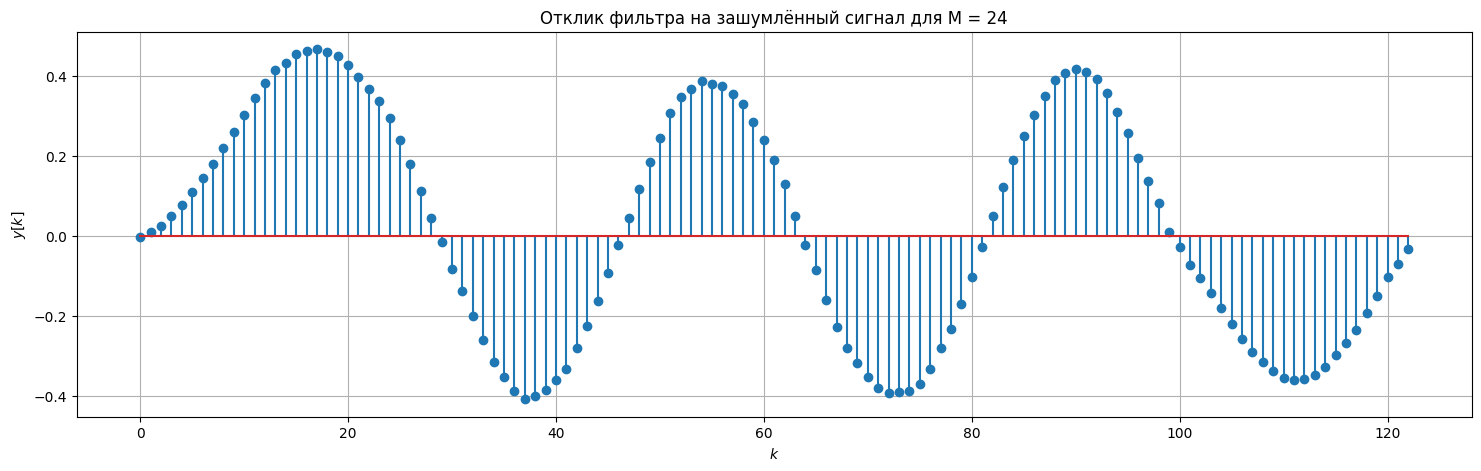

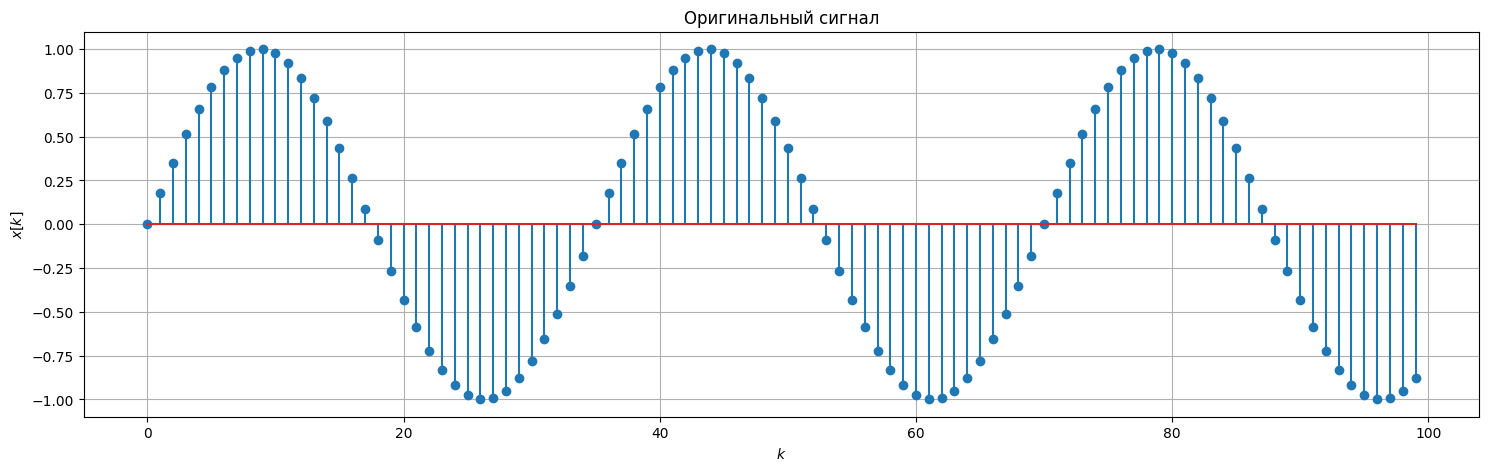

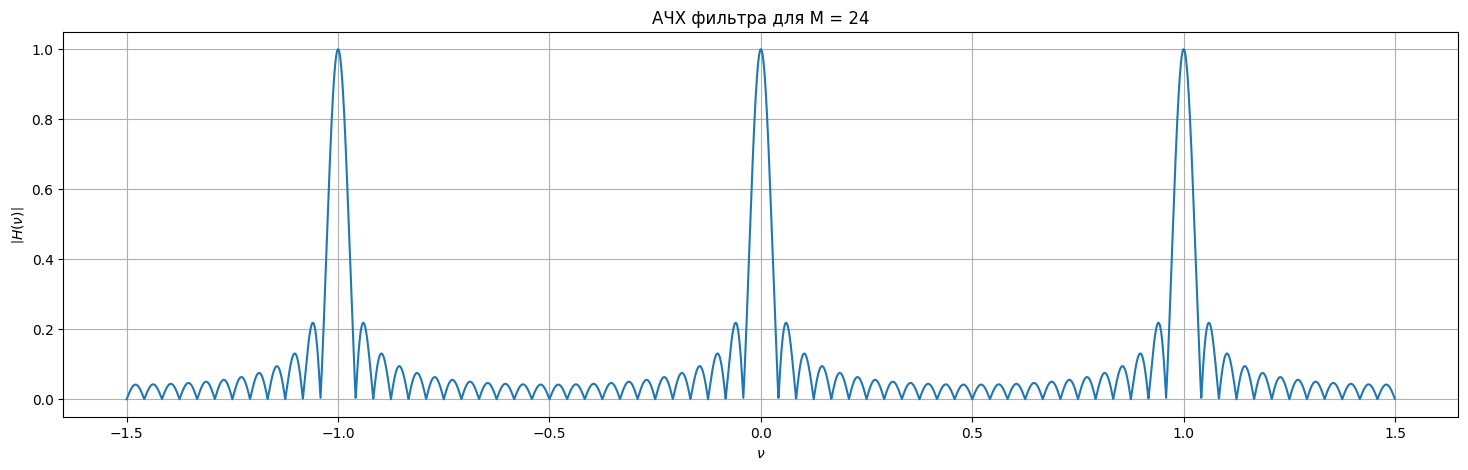

In [45]:
doAll(M2)


## Задача 2.2. Двухкаскадный фильтр

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |   7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| $a$ |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |
| $b$ |0.8 |0.7 |0.6 |0.8 |0.7 |0.6 |0.6 |0.8 |0.7 |0.6 |
| $c$ |0.5 |0.4 |0.3 |0.5 |0.3 |0.4 |0.3 |0.5 |0.3 |0.4 |
| $M$ | 50 | 60 | 50 | 50 | 50 | 60 | 50 | 50 | 50 | 60 |
| $N$ |180 |200 |220 |180 |200 |220 |220 |180 |200 |220 |

Рассмотрите двухкаскадный фильтр, каскады которого задаются следующими разностными уравнениями. 

1) $$y[k]=\dfrac{ax[k]+bx[k-M]+cx[k-2M]}{a+b+c}$$

где $a$, $b$, $c$ и $M$ заданы в таблице с вариантами.

2) $$y[k]=\dfrac{x[k]+x[k-1]}{2}.$$

Подайте на вход такого  фильтра любой сгенерированный сигнал $x[k]$ длительностью $N$ отсчетов. Измениться ли выход системы от перестановки порядка каскадов? Проведите моделирование с использованием функции `signal.convolve`

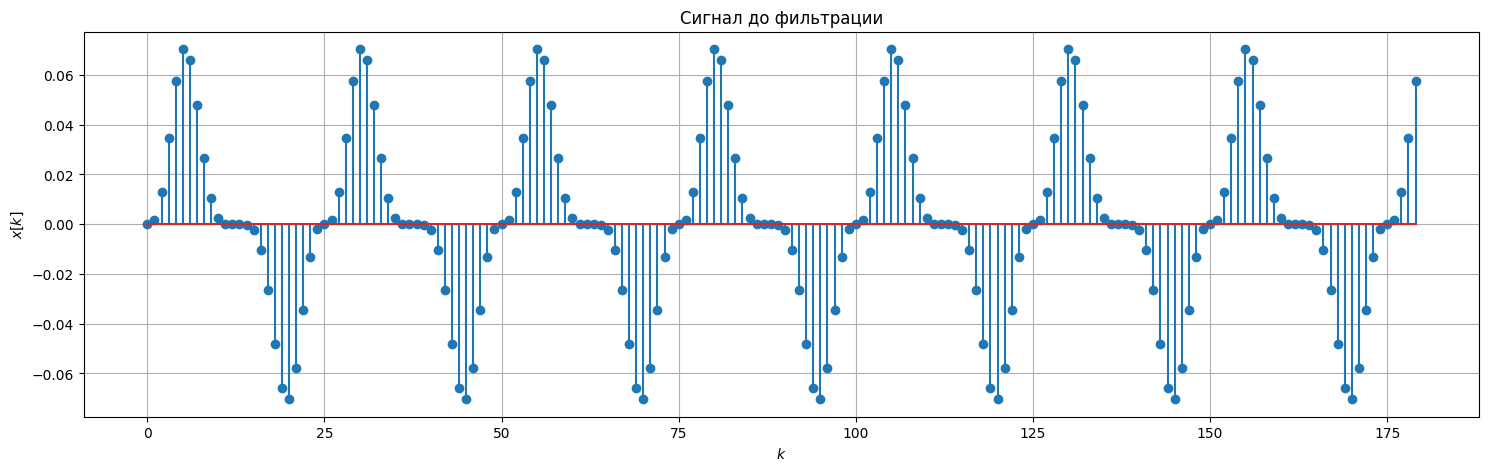

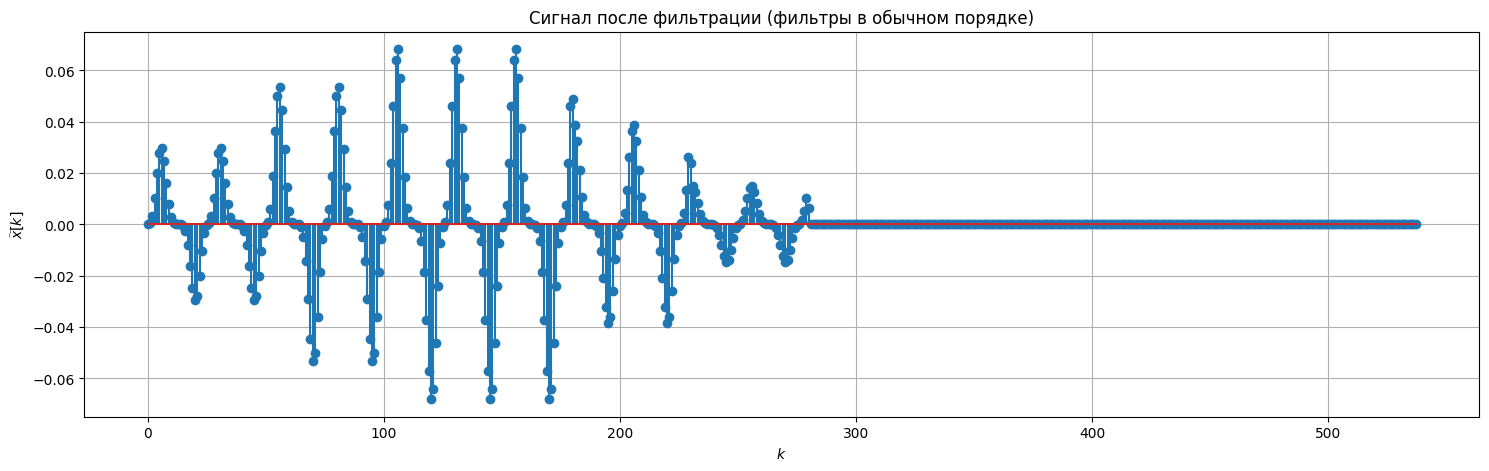

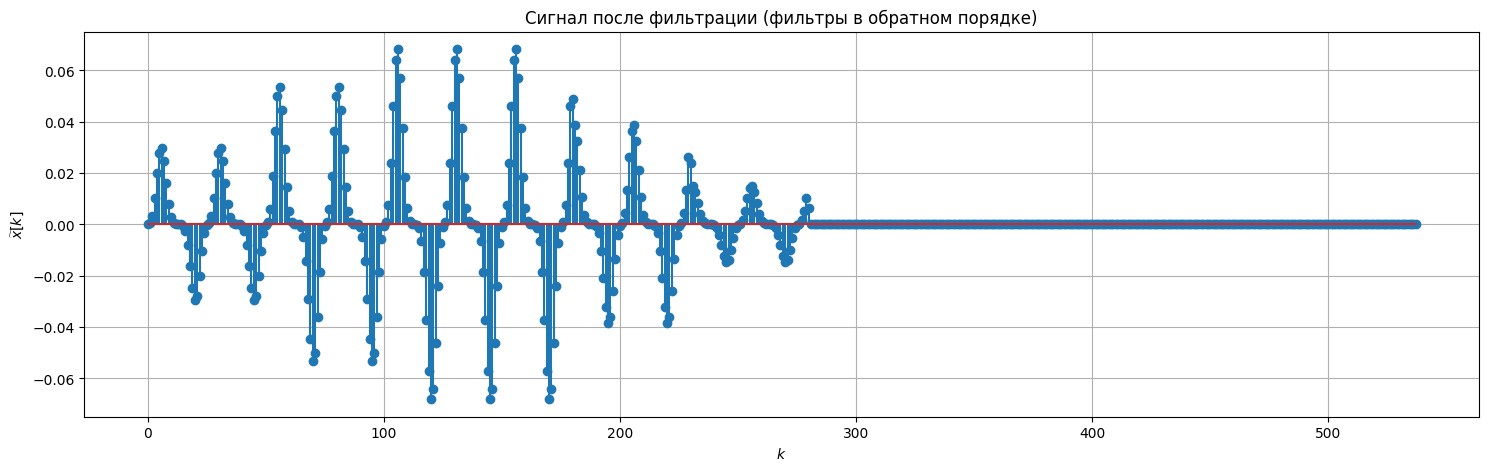

In [61]:
a, b, c, M, N = 1, 0.8, 0.5, 50, 180
abc = a + b + c
A = a / abc
B = b / abc
C = c / abc

h1 = np.zeros(N)
h1[0] = A
h1[M] = B
h1[2 * M] = C

h2 = np.zeros(N)
h2[0] = h2[1] = 0.5

k = np.arange(N)
xk = np.sin(2 * np.pi * k / M)**3 * np.cos(2 * np.pi * k / M)**5


drawStem(xk, "Сигнал до фильтрации", "$k$", "$x[k]$")

forward_filt = signal.convolve(signal.convolve(xk, h1), h2)
drawStem(forward_filt, "Сигнал после фильтрации (фильтры в обычном порядке)", "$k$", "$\\widetilde{x}[k]$")
backward_filt = signal.convolve(signal.convolve(xk, h1), h2)
drawStem(backward_filt, "Сигнал после фильтрации (фильтры в обратном порядке)", "$k$", "$\\widetilde{x}[k]$")


# Модуль 3. Аппроксимация идеальных частотно-избирательных фильтров и явление Гиббса

## Задача 3.1. Явление Гиббса для каузальной аппроксимации ИФНЧ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |   7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_c$  |0.1 |0.2 |0.3 |0.1 |0.2 |0.3 |0.2 |0.3 |0.1 | 0.2 |
|    $N$    | 30 | 20 | 30 | 20 | 30 | 20 | 24 | 22 | 26 | 28 |

Рассмотрите фильтр с импульсной характеристикой
$$
h[k] =
\left\{\begin{array}{l}
\dfrac{\sin(2\pi\nu_c (k-N))}{\pi (k-N)}, 0\le k \le 2N-1
\\
0, \; \text{при других } k.
\end{array}\right.
$$
для случая $\nu_c,\; N$ из варианта. 

Вычислите с помощью моделирования и постройте график АЧХ этого фильтра.  
Как изменяется АЧХ с ростом $N$ при фиксированной частоте среза $\nu_c$?

## Задача 3.2.  Аппроксимация фильтра с заданной частотной характеристикой с помощью ДВПФ  

Определить импульсную характеристику $h_{ideal}[k]$ фильтра, частотная характеристика которого является действительной функцией частоты и представлена на рисунке. 

Рассмотреть фильтр, импульсная характеристика которого в отличии от $h_{ideal}[k]$  усечена до $2N$ отсчетов и сдвинута на $N$ отсчетов вправо. С помощью моделирования определить и построить график АЧХ. Сравнить АЧХ обоих фильтров.

Рисунок генерируется с помощью функции `task_3_2(variant)` (приведенной ниже), где `variant` – номер варианта. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def task_3_2(variant):
    nu_c1 = [0.2, 0.15, 0.15, 0.1, 0.15, 0.15, 0.2, 0.15, 0.15, 0.1]
    amp1 = [1, 0, 0.2, 1, 1, 0.6, 0.3, 0.2, 1, 1]
    nu_c2 = [0.4, 0.35, 0.4, 0.3, 0.35, 0.4, 0.4, 0.3, 0.35, 0.4]
    amp2 = [0.4, 1, 1, 0.4, 0.7, 1, 1, 1, 0.4, 0.7]

    def H_val(nu, n):
        return (
            amp1[n]
            if abs(nu) <= nu_c1[n]
            else amp2[n]
            if abs(nu) <= nu_c2[n]
            else 0.0
        )

    nu = np.arange(-0.5, 0.5, 0.001)
    plt.figure(figsize=[6, 2], dpi=140)
    plt.plot(nu, [H_val(x, variant - 1) for x in nu], "g-")
    plt.xticks(
        [
            -0.5,
            -nu_c2[variant - 1],
            -nu_c1[variant - 1],
            0,
            nu_c1[variant - 1],
            nu_c2[variant - 1],
            0.5,
        ]
    )
    plt.grid()
    plt.yticks([0, min(amp1[variant - 1], amp2[variant - 1]), 1])
    plt.xlim([-0.5, 0.5])
    plt.xlabel("Нормированнная частота, $\\nu$")
    plt.ylabel("$H(\\nu)$")
    plt.title("Вариант %i" % variant)
    plt.tight_layout()
    plt.show()


Пример вывода задания для первого варианта.

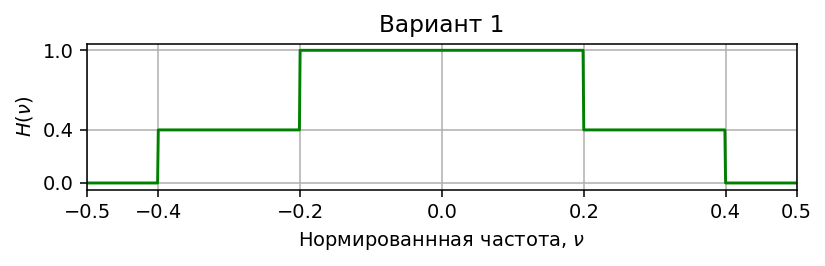

In [3]:
task_3_2(variant=1)
